<a href="https://www.kaggle.com/code/handandegerli/diabetes-prediction-w-feature-engineering?scriptVersionId=185557754" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## 1. Business Problem
* It is desired to develop a machine learning model that can predict whether people have diabetes or not when their characteristics are specified.
* You are expected to perform the necessary data analysis and feature engineering steps before developing the model.

## 2. Dataset Story
* The data set is part of a larger data set held by the National Institutes of Diabetes-Digestive-Kidney Diseases in the USA.
* Data used for a diabetes study conducted on Pima Indian women aged 21 and over living in the city of Phoenix, the 5th largest city in the State of Arizona in the USA.
* The target variable is specified as "Outcome"; 1 indicates a positive diabetes test result, 0 indicates a negative diabetes test result.
     * **Pregnancies:** Number of pregnancies
     * **Glucose:** 2-hour plasma glucose concentration in oral glucose tolerance test
     * **Blood Pressure:** Blood Pressure (diastolic blood pressure) (mm Hg)
     * **SkinThickness:** Skin Thickness
     * **Insulin:** 2-hour serum insulin (mu U/ml)
     * **DiabetesPedigreeFunction:** Function (2-hour plasma glucose concentration in oral glucose tolerance test)
     * **BMI:** Body mass index
     * **Age:** Age (years)
     * **Outcome:** Having the disease (1) or not (0)

## 3. Exploratory Data Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import date
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.width', 500)

In [3]:
# Step 1: Examine the general picture.
def load_application_train():
    data = pd.read_csv("/kaggle/input/dataset-fe-prediction/diabetes.csv")
    return data

df = load_application_train()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6000,0.6270,50,1
1,1,85,66,29,0,26.6000,0.3510,31,0
2,8,183,64,0,0,23.3000,0.6720,32,1
3,1,89,66,23,94,28.1000,0.1670,21,0
4,0,137,40,35,168,43.1000,2.2880,33,1


In [4]:
# Step 2: Capture numerical and categorical variables.

numeric_variables = df.select_dtypes(include=['float64', 'int64']).columns
categoric_variables = df.select_dtypes(include=['object']).columns

print("Numeric Variables:\n", numeric_variables)
print("\nCategoric Variables:\n", categoric_variables)

# However, 
# Outcome is a categorical variable with a numerical appearance that takes values from 1 to 0.

Numeric Variables:
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], dtype='object')

Categoric Variables:
 Index([], dtype='object')


In [5]:
# Function for Numeric, Categorical and Numerical Appearance Categorical Variables
def grab_col_names(dataframe, cat_th=10, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [6]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [7]:
cat_cols

['Outcome']

Categorical Variable - Outcome Analysis
Outcome
0    500
1    268
Name: count, dtype: int64



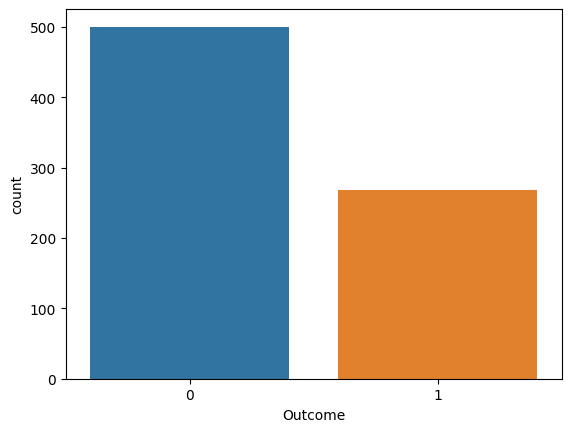

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0000,3.8451,3.3696,0.0000,1.0000,3.0000,6.0000,17.0000
Glucose,768.0000,120.8945,31.9726,0.0000,99.0000,117.0000,140.2500,199.0000
BloodPressure,768.0000,69.1055,19.3558,0.0000,62.0000,72.0000,80.0000,122.0000
SkinThickness,768.0000,20.5365,15.9522,0.0000,0.0000,23.0000,32.0000,99.0000
Insulin,768.0000,79.7995,115.2440,0.0000,0.0000,30.5000,127.2500,846.0000
BMI,768.0000,31.9926,7.8842,0.0000,27.3000,32.0000,36.6000,67.1000
DiabetesPedigreeFunction,768.0000,0.4719,0.3313,0.0780,0.2437,0.3725,0.6262,2.4200
Age,768.0000,33.2409,11.7602,21.0000,24.0000,29.0000,41.0000,81.0000


In [8]:
# Step 3: Analyze numerical and categorical variables.

# Categorical Variable Analysis
for col in cat_cols:
     print(f"Categorical Variable - {col} Analysis")
     print(df[col].value_counts(), end="\n\n")
     sns.countplot(x=df[col], data=df)
     plt.show()

    
# Analysis of Numerical Variables
df[num_cols].describe().T

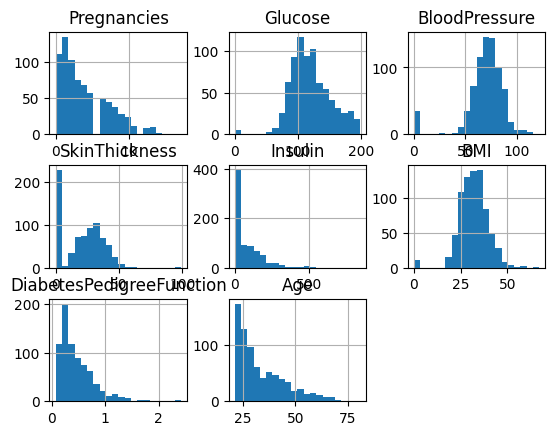

In [9]:
df[num_cols].hist(bins=20)
plt.xlabel(num_cols)
plt.title(num_cols)
plt.show()

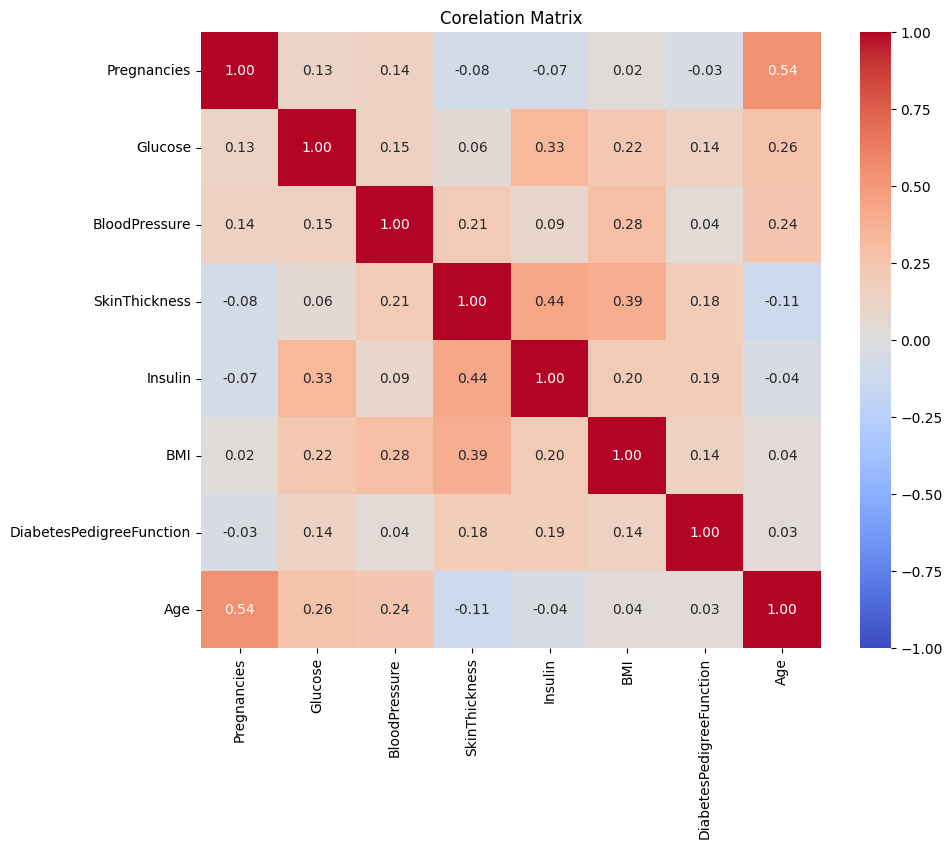

In [10]:
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Corelation Matrix")
plt.show()


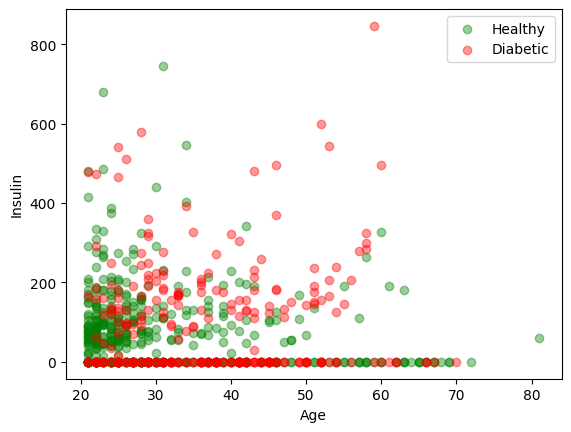

In [11]:
diabetic = df[df.Outcome == 1]
healthy = df[df.Outcome == 0]

plt.scatter(healthy.Age, healthy.Insulin, color="green", label="Healthy", alpha = 0.4)
plt.scatter(diabetic.Age, diabetic.Insulin, color="red", label="Diabetic", alpha = 0.4)
plt.xlabel("Age")
plt.ylabel("Insulin")
plt.legend()
plt.show()

In [12]:
#Base Model in order to show a reference

y = df["Outcome"]
X = df.drop("Outcome", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),3)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")

Accuracy: 0.77
Recall: 0.706
Precision: 0.59
F1: 0.64
Auc: 0.75


In [13]:
# Check if there is any missing data.
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns
missing_values_table(df)
# There is no missing data in the data

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [14]:
# Step 4: Target variable analysis. (Mean of target variable according to categorical variables,
print("Target Variable Distribution:")
print(df["Outcome"].value_counts())

#Distribution is not normal. Data is limited.

Target Variable Distribution:
Outcome
0    500
1    268
Name: count, dtype: int64


In [15]:
# Mean of Target Variable According to Numerical Variables
print("Mean of the Target Variable by Numeric Variables:")
print(df.groupby("Outcome").mean())

Mean of the Target Variable by Numeric Variables:
         Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  DiabetesPedigreeFunction     Age
Outcome                                                                                                       
0             3.2980 109.9800        68.1840        19.6640  68.7920 30.3042                    0.4297 31.1900
1             4.8657 141.2575        70.8246        22.1642 100.3358 35.1425                    0.5505 37.0672


In [16]:
def outlier_thresholds(dataframe, col_name):
    q1 = dataframe[col_name].quantile(0.25)
    q3 = dataframe[col_name].quantile(0.75)
    interquantile_range = q3 - q1
    up_limit = q3 + 1.5 * interquantile_range
    low_limit = q1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [17]:
# Check Outliers in Data
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
check_outlier(df,"Pregnancies")

True

In [18]:
# Adım 5: Conduct an outlier observation analysis.
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

In [19]:
# Outlier control for each numerical variable
grab_outliers(df, "Pregnancies")

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  DiabetesPedigreeFunction  Age  Outcome
88            15      136             70             32      110 37.1000                    0.1530   43        1
159           17      163             72             41      114 40.9000                    0.8170   47        1
298           14      100             78             25      184 36.6000                    0.4120   46        1
455           14      175             62             30        0 33.6000                    0.2120   38        1


In [20]:
grab_outliers(df, "Glucose")

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  DiabetesPedigreeFunction  Age  Outcome
75             1        0             48             20        0 24.7000                    0.1400   22        0
182            1        0             74             20       23 27.7000                    0.2990   21        0
342            1        0             68             35        0 32.0000                    0.3890   22        0
349            5        0             80             32        0 41.0000                    0.3460   37        1
502            6        0             68             41        0 39.0000                    0.7270   41        1


In [21]:
grab_outliers(df, "BloodPressure")

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  DiabetesPedigreeFunction  Age  Outcome
7            10      115              0              0        0 35.3000                    0.1340   29        0
15            7      100              0              0        0 30.0000                    0.4840   32        1
18            1      103             30             38       83 43.3000                    0.1830   33        0
43            9      171            110             24      240 45.4000                    0.7210   54        1
49            7      105              0              0        0  0.0000                    0.3050   24        0


In [22]:
grab_outliers(df, "SkinThickness")

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  DiabetesPedigreeFunction  Age  Outcome
579            2      197             70             99        0 34.7000                    0.5750   62        1


In [23]:
grab_outliers(df, "Insulin")

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  DiabetesPedigreeFunction  Age  Outcome
8              2      197             70             45      543 30.5000                    0.1580   53        1
13             1      189             60             23      846 30.1000                    0.3980   59        1
54             7      150             66             42      342 34.7000                    0.7180   42        0
111            8      155             62             26      495 34.0000                    0.5430   46        1
139            5      105             72             29      325 36.9000                    0.1590   28        0


In [24]:
grab_outliers(df, "BMI")

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  DiabetesPedigreeFunction  Age  Outcome
9              8      125             96              0        0  0.0000                    0.2320   54        1
49             7      105              0              0        0  0.0000                    0.3050   24        0
60             2       84              0              0        0  0.0000                    0.3040   21        0
81             2       74              0              0        0  0.0000                    0.1020   22        0
120            0      162             76             56      100 53.2000                    0.7590   25        1


In [25]:
grab_outliers(df, "DiabetesPedigreeFunction")

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  DiabetesPedigreeFunction  Age  Outcome
4             0      137             40             35      168 43.1000                    2.2880   33        1
12           10      139             80              0        0 27.1000                    1.4410   57        0
39            4      111             72             47      207 37.1000                    1.3900   56        1
45            0      180             66             39        0 42.0000                    1.8930   25        1
58            0      146             82              0        0 40.5000                    1.7810   44        0


In [26]:
grab_outliers(df, "Age")

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  DiabetesPedigreeFunction  Age  Outcome
123            5      132             80              0        0 26.8000                    0.1860   69        0
363            4      146             78              0        0 38.5000                    0.5200   67        1
453            2      119              0              0        0 19.6000                    0.8320   72        0
459            9      134             74             33       60 25.9000                    0.4600   81        0
489            8      194             80              0        0 26.1000                    0.5510   67        0
537            0       57             60              0        0 21.7000                    0.7350   67        0
666            4      145             82             18        0 32.5000                    0.2350   70        1
674            8       91             82              0        0 35.6000                    0.58

In [27]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [28]:
# Threshold values were used for Pregnancies, Age, SkinThickness, Insulin and DiabetesPedigreeFunction.
replace_with_thresholds(df, "Pregnancies")
replace_with_thresholds(df, "Age")
replace_with_thresholds(df, "SkinThickness")
replace_with_thresholds(df, "Insulin")
replace_with_thresholds(df, "DiabetesPedigreeFunction")

/tmp/ipykernel_18/130684917.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-6.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
/tmp/ipykernel_18/130684917.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
/tmp/ipykernel_18/130684917.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-190.875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit


In [29]:
# Checking 0 values in the data
def show_zero_values(dataframe):
    #zero_values = {col: dataframe[col].isin([0]).sum() for col in dataframe.columns}
    zero_values = {col: dataframe[col].isin([0]).sum() for col in dataframe.columns if col != "Outcome"}
    zero_values = {k: v for k, v in zero_values.items() if v > 0}
    return zero_values
show_zero_values(df)

{'Pregnancies': 111,
 'Glucose': 5,
 'BloodPressure': 35,
 'SkinThickness': 227,
 'Insulin': 374,
 'BMI': 11}

In [30]:
# 0 values in the data cause problems in variables such as "Glucose" and "Age".
# Therefore, we can replace 0 values with NaN, but there will be a problem in setting up the model.
# For this reason, variable-specific interventions will be made to NaN data.
zero_variables = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[zero_variables] = df[zero_variables].replace(0, np.nan)

In [31]:
# Replacing NaN data with median
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].median())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].median())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())

In [32]:
# Since insulin levels have a large number of missing values, a more complex imputation strategy, 
# "KNN Imputer", one of the model-based imputation methods, was used for this variable.
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df['Insulin'] = imputer.fit_transform(df[['Insulin']])

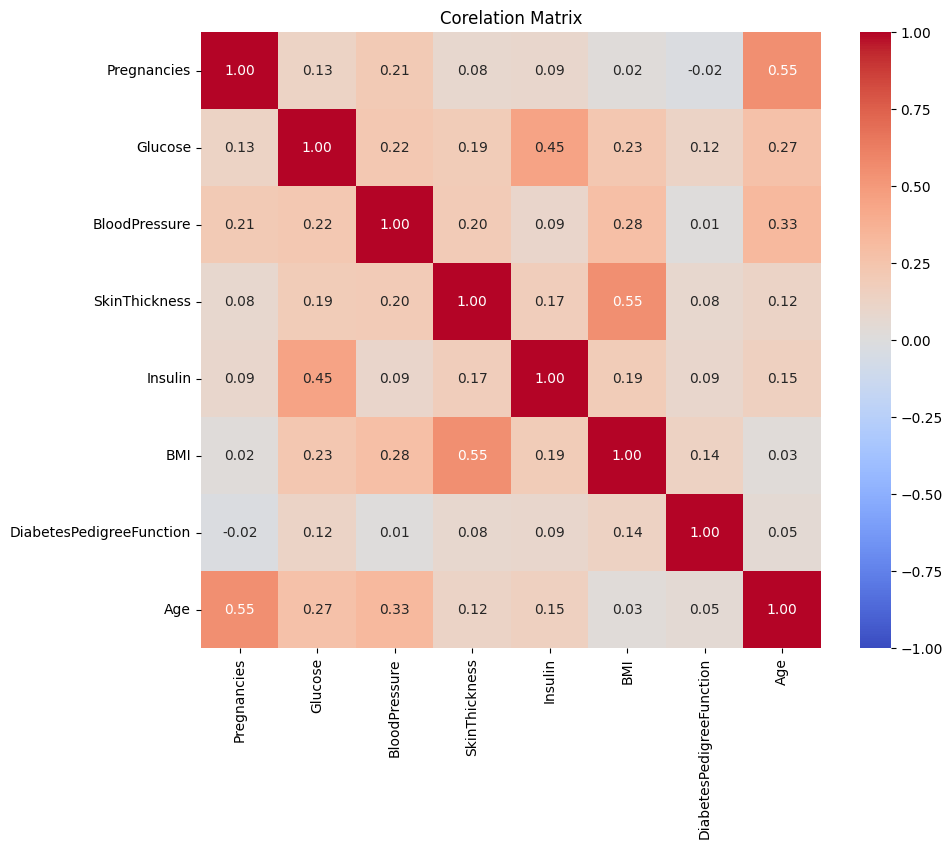

In [33]:
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Corelation Matrix")
plt.show()

## 4. Feature Engineering 

In [34]:
# Define BMI categories and their corresponding limits
categories = ["Underweight", "Normalweight", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"]
boundaries = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]  # float('inf') for upper bound

# Sort BMI values into categories defined by limits
df["NewBMI"] = pd.cut(df["BMI"], bins=boundaries, labels=categories, right=False)

In [35]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6.0000,148.0000,72.0000,35.0000,143.5666,33.6000,0.6270,50.0000,1,Obesity 1
1,1.0000,85.0000,66.0000,29.0000,143.5666,26.6000,0.3510,31.0000,0,Overweight
2,8.0000,183.0000,64.0000,29.0000,143.5666,23.3000,0.6720,32.0000,1,Normalweight
3,1.0000,89.0000,66.0000,23.0000,94.0000,28.1000,0.1670,21.0000,0,Overweight
4,0.0000,137.0000,40.0000,35.0000,168.0000,43.1000,1.2000,33.0000,1,Obesity 3


In [36]:
# Define categories for new insulin levels
NewInsulin = pd.Series(["LowInsulin", "NormalInsulin", "HighInsulin", "VeryHighInsulin"], dtype="category")

# Initially set all values to "Normal" by default
df["NewInsulin"] = NewInsulin[1]

# Specify conditions for each category
df.loc[df["Insulin"] < 16, "NewInsulin"] = NewInsulin[0] # Low
df.loc[(df["Insulin"] >= 16) & (df["Insulin"] <= 166), "NewInsulin"] = NewInsulin[1] # Normal
df.loc[(df["Insulin"] > 166) & (df["Insulin"] <= 300), "NewInsulin"] = NewInsulin[2] # High
df.loc[df["Insulin"] > 300, "NewInsulin"] = NewInsulin[3] # Very High

In [37]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulin
0,6.0000,148.0000,72.0000,35.0000,143.5666,33.6000,0.6270,50.0000,1,Obesity 1,NormalInsulin
1,1.0000,85.0000,66.0000,29.0000,143.5666,26.6000,0.3510,31.0000,0,Overweight,NormalInsulin
2,8.0000,183.0000,64.0000,29.0000,143.5666,23.3000,0.6720,32.0000,1,Normalweight,NormalInsulin
3,1.0000,89.0000,66.0000,23.0000,94.0000,28.1000,0.1670,21.0000,0,Overweight,NormalInsulin
4,0.0000,137.0000,40.0000,35.0000,168.0000,43.1000,1.2000,33.0000,1,Obesity 3,HighInsulin


In [38]:
# Define Glucose categories and their corresponding boundaries
categories = ["LowGlucose", "NormalGlucose", "Prediabetes", "Diabetes"]
boundaries = [0, 70, 99, 126, float('inf')] # Define boundaries of glucose levels

# Sort Glucose values into categories defined by limits
df["NewGlucose"] = pd.cut(df["Glucose"], bins=boundaries, labels=categories, right=False)

In [39]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulin,NewGlucose
0,6.0000,148.0000,72.0000,35.0000,143.5666,33.6000,0.6270,50.0000,1,Obesity 1,NormalInsulin,Diabetes
1,1.0000,85.0000,66.0000,29.0000,143.5666,26.6000,0.3510,31.0000,0,Overweight,NormalInsulin,NormalGlucose
2,8.0000,183.0000,64.0000,29.0000,143.5666,23.3000,0.6720,32.0000,1,Normalweight,NormalInsulin,Diabetes
3,1.0000,89.0000,66.0000,23.0000,94.0000,28.1000,0.1670,21.0000,0,Overweight,NormalInsulin,NormalGlucose
4,0.0000,137.0000,40.0000,35.0000,168.0000,43.1000,1.2000,33.0000,1,Obesity 3,HighInsulin,Diabetes


## 5. One-hot Encoding

In [40]:
# Define one_hot_encoder function.
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

# Call the one_hot_encoder function
df = one_hot_encoder(df, categorical_cols=["NewBMI", "NewInsulin", "NewGlucose"], drop_first=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Normalweight,NewBMI_Overweight,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewInsulin_LowInsulin,NewInsulin_NormalInsulin,NewInsulin_VeryHighInsulin,NewGlucose_NormalGlucose,NewGlucose_Prediabetes,NewGlucose_Diabetes
0,6.0000,148.0000,72.0000,35.0000,143.5666,33.6000,0.6270,50.0000,1,False,False,True,False,False,False,True,False,False,False,True
1,1.0000,85.0000,66.0000,29.0000,143.5666,26.6000,0.3510,31.0000,0,False,True,False,False,False,False,True,False,True,False,False
2,8.0000,183.0000,64.0000,29.0000,143.5666,23.3000,0.6720,32.0000,1,True,False,False,False,False,False,True,False,False,False,True
3,1.0000,89.0000,66.0000,23.0000,94.0000,28.1000,0.1670,21.0000,0,False,True,False,False,False,False,True,False,True,False,False
4,0.0000,137.0000,40.0000,35.0000,168.0000,43.1000,1.2000,33.0000,1,False,False,False,False,True,False,False,False,False,False,True


## 6. Feature Standartization

### Note:
* **RobustScaler** for health-related metrics that may not always follow a Gaussian distribution and may have outliers (e.g. extremely high or low insulin levels),
* It may be a better choice since it is less sensitive to outlier values than **StandardScaler** and **MinMaxScaler**.
* However, our model is based on the **assumption of normally distributed data** (for example, linear models), 
* **since outlier values are suppressed**, for these reasons we will use **StandardScaler**.

In [41]:
def scale_features(dataframe, scaler=StandardScaler()):
    scaled_columns = scaler.fit_transform(dataframe)
    dataframe = pd.DataFrame(scaled_columns, columns=dataframe.columns)
    return dataframe

## 7. Model

In [42]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt

In [43]:
# Definition of numeric columns to scale
numerical_cols = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'
]

In [44]:
# Specify the Target column
target= 'Outcome'

# Separate Features and Target
X = df.drop(target, axis=1)
y = df[target]

In [45]:
# Scaling features
def scale_features(dataframe, features_to_scale, scaler=StandardScaler()):
     scaled_columns = scaler.fit_transform(dataframe[features_to_scale])
     dataframe_scaled = pd.DataFrame(scaled_columns, columns=features_to_scale, index=dataframe.index)
     return pd.concat([dataframe.drop(features_to_scale, axis=1), dataframe_scaled], axis=1)

# Scaling numeric features in x
X_scaled = scale_features(X, numerical_cols)

In [46]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=12345)

In [47]:
# Models to be evalauted
models = [
    ('LR', LogisticRegression(random_state=12345)),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier(random_state=12345)),
    ('RF', RandomForestClassifier(random_state=12345)),
    ('SVM', SVC(gamma='auto', random_state=12345)),
    ('XGB', GradientBoostingClassifier(random_state=12345)),
    ("LightGBM", LGBMClassifier(random_state=12345, verbose=-1)) # verbose=-1 urayı çıktılarını gizlemek için
]

### Note:
* The selected models are generally those that are widely used and considered effective for binary classification problems.
* For medical classification problems such as diabetes prediction, each of these models may offer different advantages.
* Depending on the characteristics and structure of the data set, the performance of these models may vary.

In [48]:
# Repeat the steps of scaling the dataset and evaluating the model
from sklearn.preprocessing import StandardScaler

# Scaling input data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cross-validation results for each model
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=12345, shuffle=True)
    cv_results = cross_val_score(model, X_scaled, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f"{name}: Mean accuracy={cv_results.mean():.4f}, Std={cv_results.std():.4f}")


LR: Mean accuracy=0.7590, Std=0.0447
KNN: Mean accuracy=0.7500, Std=0.0485
CART: Mean accuracy=0.7096, Std=0.0348
RF: Mean accuracy=0.7592, Std=0.0460
SVM: Mean accuracy=0.7526, Std=0.0550
XGB: Mean accuracy=0.7616, Std=0.0519
LightGBM: Mean accuracy=0.7604, Std=0.0483


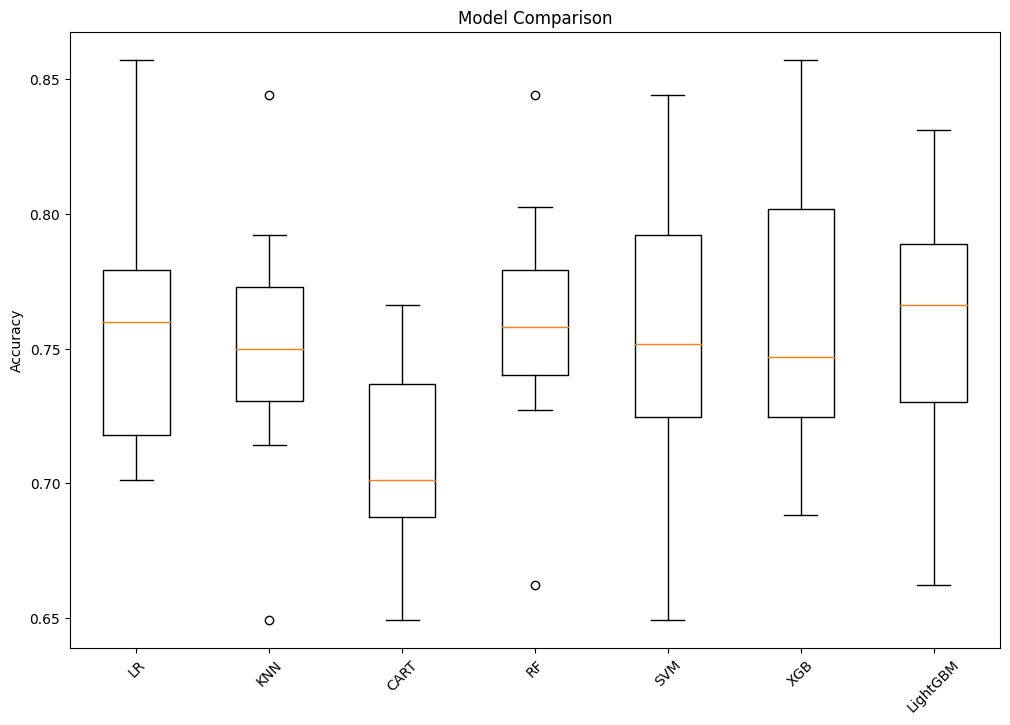

In [49]:
# Visualizing model performances with a box plot
plt.figure(figsize=(12, 8))
plt.boxplot(results, labels=names)
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

#### Best performing models:
* Randon Forest
* XGBoost
* LightGBM


## 8. Model Tunning


### 8.1.1. Random Forest(RF) Fine Tuning

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter ranges

param_grid = {
    'n_estimators': [100, 200],  # Reduced to two options, as going beyond 200 gives diminishing returns for many tasks
  #  'max_features': ['auto'],  # auto caused deprecation
    'max_depth': [6, 8, 10],  # Focus on mid to high range where performance improvements are often observed
    'min_samples_split': [2, 5],  # Simplified range, balancing model complexity and overfitting control
    'min_samples_leaf': [1, 2]  # Reduced range to control overfitting while keeping the model relatively simple
}

# Define the Random Forest model with verbose set to 0 to suppress the output
rf = RandomForestClassifier(random_state=12345, verbose=0)

# Create the GridSearchCV object with verbose set to 0 to minimize logging
grid_search = GridSearchCV(estimator=rf, 
                           param_grid=param_grid, 
                           cv=3, 
                           n_jobs=-1, 
                           verbose=0,  # This controls the verbosity: the higher, the more messages.
                           scoring="accuracy")


grid_search.fit(X_train, y_train)

# After fitting, you can print the best parameters and get the best estimator
print("Best Parameters:", grid_search.best_params_)
best_grid_rf = grid_search.best_estimator_


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


###  8.1.2 Random Forest(RF) Final Model

In [51]:
from sklearn.ensemble import RandomForestClassifier

# Define the model with the best hyperparameters obtained from GridSearchCV
best_params = grid_search.best_params_
best_rf_model = RandomForestClassifier(**best_params, random_state=12345)

# Train the best model with training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = best_rf_model.predict(X_train)

# Make predictions on the test set
y_test_pred = best_rf_model.predict(X_test)

# Evaluate performance
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.9479
Test Accuracy: 0.8117


### 8.1.3. Random Forest(RF) Feature Importance

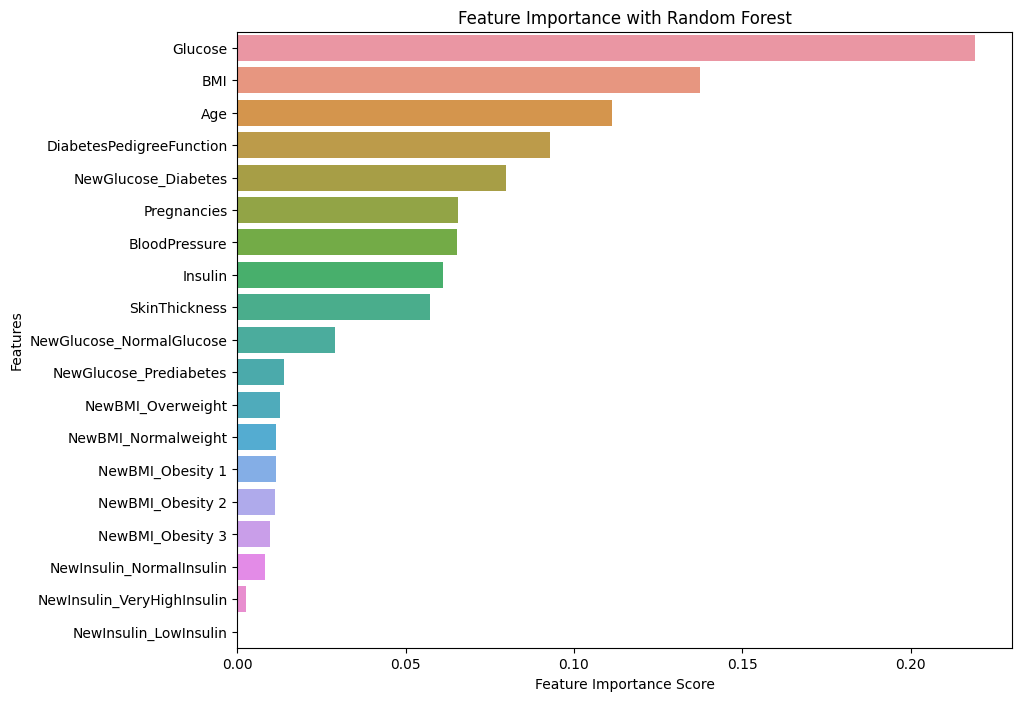

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get attribute importance of Random Forest model
feature_importances = pd.Series(best_rf_model.feature_importances_,
                                 index=X_train.columns).sort_values(ascending=False)

# Visualize attribute importance
plt.figure(figsize=(10, 8)) # Set chart size
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance Score') # Attribute Importance Score
plt.ylabel('Features') # Attributes
plt.title('Feature Importance with Random Forest') # Visualizing Important Features with Random Forest
plt.show()

### 8.2.1. XGBoost Fine Tuning

In [53]:
from xgboost import XGBClassifier

param_grid_xgb= {
    'n_estimators': [100, 200],  # Optimize for speed and to prevent overfitting
    'learning_rate': [0.1, 0.2],  # Moderate learning rates for balance between performance and convergence
    'max_depth': [4, 6],  # Reduced to focus on preventing overfitting and reducing computational cost
    'colsample_bytree': [0.7, 1.0],  # Focusing on higher feature sampling for diversity in tree construction
    'subsample': [0.7, 1.0]  # Optimized for sampling efficiency and to prevent overfitting
}


xgb = XGBClassifier(random_state=12345)

grid_search_xgb = GridSearchCV(estimator=xgb, 
                               param_grid=param_grid_xgb, 
                               cv=3, 
                               n_jobs=-1, 
                               verbose=0, 
                               scoring="accuracy")

grid_search_xgb.fit(X_train, y_train)

print("Best Parameters:", grid_search_xgb.best_params_)

best_grid_xgb = grid_search_xgb.best_estimator_

Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.7}


### 8.2.2. XGBoost Final Model

In [54]:
final_model = XGBClassifier(**grid_search_xgb.best_params_, random_state=12345)
final_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_model.predict(X_test)
# Make predictions on the training set
y_train_pred = final_model.predict(X_train)

# Evaluate performance
from sklearn.metrics import accuracy_score
print("Test Accuracy Score:", accuracy_score(y_test, y_pred))

# Evaluate training set performance
print("Training Accuracy Score:", accuracy_score(y_train, y_train_pred))

Test Accuracy Score: 0.7597402597402597
Training Accuracy Score: 0.9462540716612378


### 8.2.3. XGBoost Feature Importance

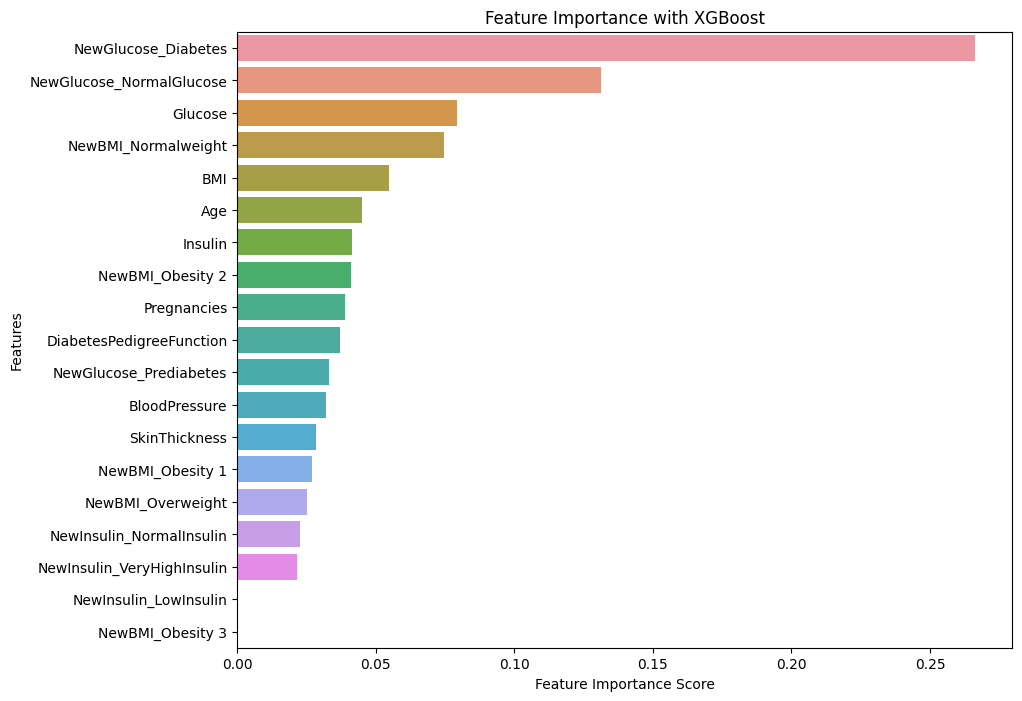

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get feature importance of XGBoost model
feature_imp = pd.Series(final_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 8)) # Set chart size
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score') # Attribute Importance Score
plt.ylabel('Features') # Attributes
plt.title('Feature Importance with XGBoost') # Visualizing Important Attributes with XGBoost
plt.show()


### 8.3.1. LightGBM Fine Tuning 

In [56]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameter ranges for LightGBM
param_grid = {
    'n_estimators': [100, 150],  # Reduced upper limit to control overfitting and computational time
    'learning_rate': [0.05, 0.1],  # Focused on a narrow, effective range for faster convergence
    'max_depth': [4, 6],  # Limited depth to prevent overfitting while allowing the model to learn complex patterns
    'colsample_bytree': [0.8, 1.0],  # Optimized for feature sampling to ensure model robustness
    'subsample': [0.8, 1.0],  # Limited to higher values to use more data for learning while controlling overfitting
}

# Define LightGBM model
lgbm = LGBMClassifier(random_state=12345, verbose=-1)

# Create GridSearchCV object
grid_search_lgbm = GridSearchCV(estimator=lgbm,
                                 param_grid=param_grid,
                                 cv=3,
                                 n_jobs=-1,
                                 verbose=0,
                                 scoring='accuracy')

# Train the model with training data
grid_search_lgbm.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search_lgbm.best_params_)

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}


### 8.3.2. LightGBM Final Model

In [57]:
# Define LightGBM model with optimal hyperparameters
best_params = grid_search_lgbm.best_params_
best_lgbm = LGBMClassifier(**best_params, random_state=12345, verbose=-1)

# Train the best model with training data
best_lgbm.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = best_lgbm.predict(X_train)

# Make predictions on the test set
y_test_pred = best_lgbm.predict(X_test)

# Evaluate performance
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.8779
Test Accuracy: 0.7987


### 8.3.3. LightGBM Feature Importance

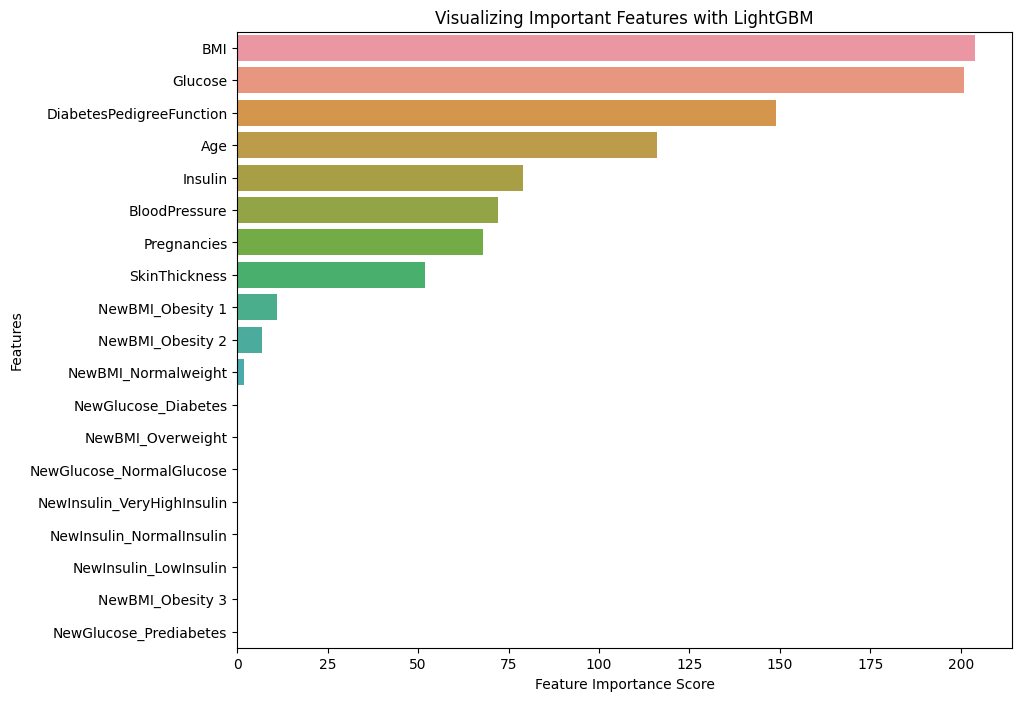

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get feature importance of LightGBM model
feature_imp = pd.Series(best_lgbm.feature_importances_,
                         index=X_train.columns).sort_values(ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 8)) # Set chart size
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score') # Attribute Importance Score
plt.ylabel('Features') # Attributes
plt.title('Visualizing Important Features with LightGBM')
# Visualizing Important Attributes with LightGBM
plt.show()

## 9. Final Model Comparison

In [59]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt

In [60]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# Update the 'max_depth' for RandomForestClassifier
rf_best_params = grid_search.best_params_.copy()
rf_best_params.update({'max_depth': 10, 
                       'n_estimators': 700})

# Update the parameters for XGBClassifier
xgb_best_params = grid_search_xgb.best_params_.copy()
xgb_best_params.update({'learning_rate': 0.01, 
                        'max_depth': 6, 
                        'n_estimators': 700})  

# Update the parameters for LGBMClassifier
lgbm_best_params = grid_search_lgbm.best_params_.copy()
lgbm_best_params.update({'learning_rate': 0.01, 
                         'max_depth': 3, 
                         'n_estimators': 1000, 
                         'verbose': -1})

# Model list
models = [
    ('RF', RandomForestClassifier(**rf_best_params, random_state=12345)),
    ('XGB', XGBClassifier(**xgb_best_params, random_state=12345)),
    ('LightGBM', LGBMClassifier(**lgbm_best_params, random_state=12345))
]

# Empty lists to store results
names = []
results = []

# Cross-validate each model and store results
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f"{name}: Mean accuracy={cv_results.mean():.4f}, Std={cv_results.std():.4f}")


RF: Mean accuracy=0.7654, Std=0.0452
XGB: Mean accuracy=0.7524, Std=0.0299
LightGBM: Mean accuracy=0.7541, Std=0.0280


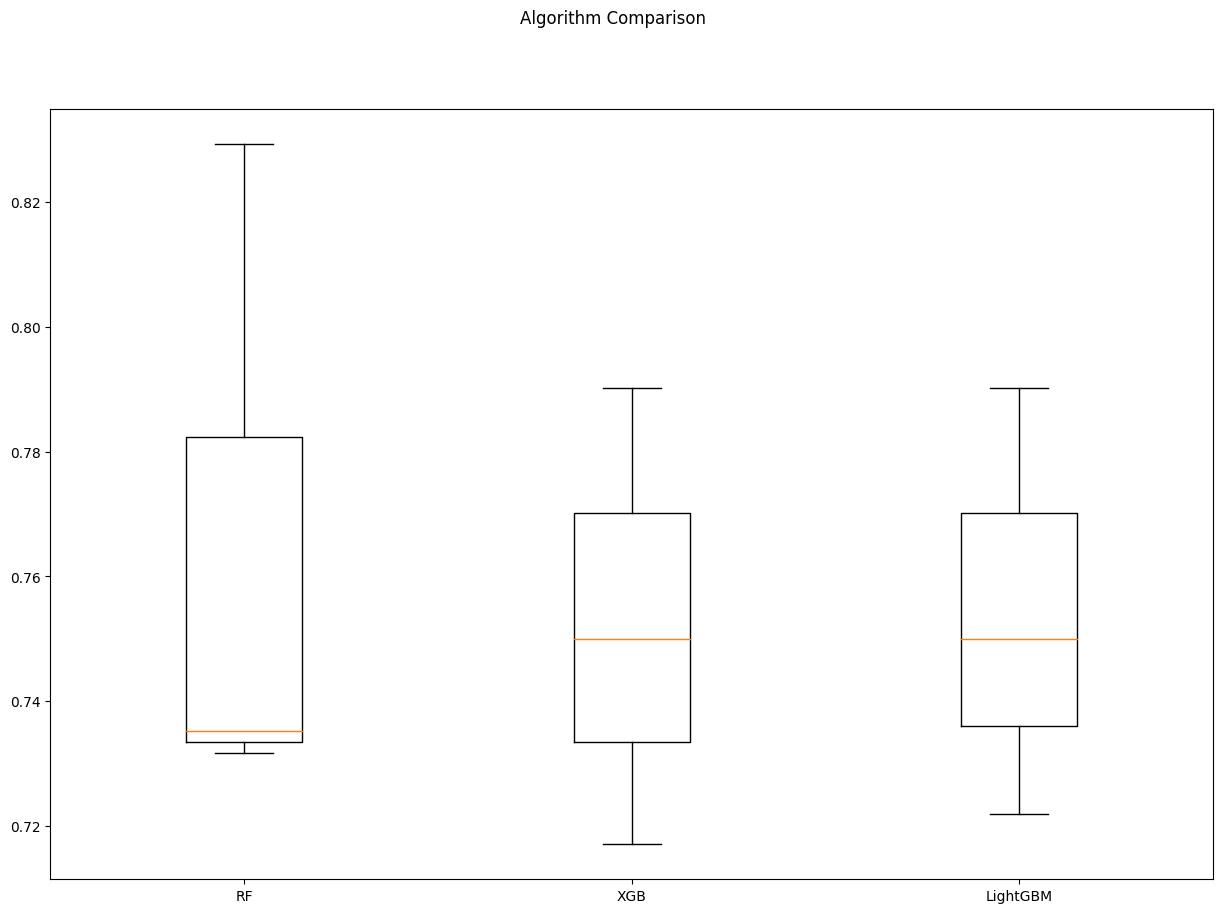

In [61]:
# Plot boxplot of algorithm comparison
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## 10. Conclusion
* When choosing between 3 models, it is important to pay attention not only to the average accuracy value but also to the standard deviation values.
* When evaluating the 3 models separately, the difference in the **Train** and **Text** **accuracy** values is **overfitting**, so tuning parameters will be useful.
* **Random Forest** has the highest average accuracy, while **LightGBM** has the lowest standard deviation and provides the most consistent results.
* As a result of model comparison, while **RF offers the highest average accuracy** , its variance is also the highest, indicating that its performance may vary more in different data sets.
* XGB has slightly lower average accuracy with less variance, making it a more consistent option.
* LightGBM offers the most consistent performance with **the lowest average accuracy** but the lowest variance.
* To make our model **more robust to variability** in datasets, LightGBM may be a more suitable option.
* However, **when achieving a small increase in average accuracy is more important**, Random Forest may be preferred.

    **In conclusion**, selecting the optimal model for predictive tasks requires a balanced consideration of both accuracy and consistency across datasets. While Random Forest leads in terms of average accuracy, suggesting it may be preferable for scenarios where the highest predictive performance is crucial, its higher variance indicates a potential for less consistent results across varying datasets. LightGBM, despite its slightly lower average accuracy, emerges as the most consistent performer, offering a compelling choice for applications where robustness to dataset variability is paramount. Ultimately, the decision between these models should be guided by the specific requirements of the application, whether it prioritizes maximizing accuracy or ensuring stable performance across different data scenarios.